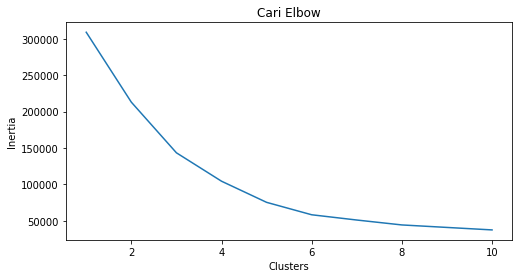

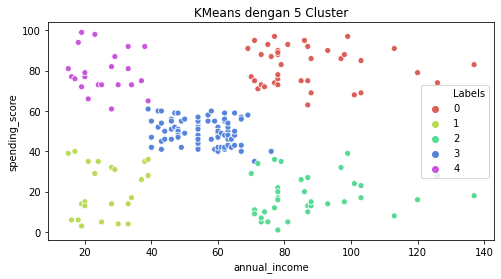

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('Mall_Customers.csv')
df.head(3)

df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})

df['gender'].replace(['Female', 'Male'], [0, 1], inplace = True)

from sklearn.cluster import KMeans

x = df.drop(['CustomerID', 'gender'], axis = 1)
clusters = []
for i in range(1, 11):
  km = KMeans(n_clusters = i).fit(x)
  clusters.append(km.inertia_)

# membuat plot
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(x)
# menambahkan kolom label pada dataset
x['Labels'] = km5.labels_
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x['annual_income'], x['spending_score'], hue=x['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()